In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn


# make sure the current path is Code/
os.chdir('..')
from PLS_Silvia.helpers_PLS import *

# **Predicting using FMRI data the behavior**

The idea is to use some data in order to predict the behavior. <br>

The first step that will be implemented will be to take each of the big5 and perform CPM on 1 single movie on bold and the other higher level info. 

### **CPM, 1 Big Five and 1 single film, BOLD and triangles**

**STEPS:**
1. Load and Preprocess the Data: 
- Load your connectome data and the behavioral feature.
- Normalize or standardize your data as necessary.
2. Feature Selection:
- Calculate the correlation between each connectivity feature and the behavioral variable.
- Select features (edges) with a correlation above a certain threshold.
3. Model Building:
- Divide your data into a training set and a test set.
- Use the selected features to build a predictive model (e.g., linear regression) on the training set.
4. Validation:
- Evaluate the model on the test set.
- Calculate prediction accuracy, using metrics like correlation or mean squared error between predicted and actual behavioral scores.
5. Cross-Validation:
- Implement cross-validation to ensure that your model is robust and generalizes well to new data.

In [5]:
list_movies = ['AfterTheRain', 'BetweenViewings', 'BigBuckBunny', 'Chatter', 'FirstBite', 'LessonLearned', 'Payload', 'Rest', 'Sintel', 'Spaceman', 'Superhero', 'TearsOfSteel', 'TheSecretNumber', 'ToClaireFromSonny', 'YouAgain']

In [6]:
# Load the Y behavioural data
PATH_DATA = '/Users/silviaromanato/Desktop/SEMESTER_PROJECT/HigherOrder/Data/'
columns = ['BIG5_ext', 'BIG5_agr', 'BIG5_con', 'BIG5_neu', 'BIG5_ope']

Y = pd.read_csv(PATH_DATA + 'participants.tsv', sep='\t', header=0)[columns]
extrovercy = Y['BIG5_ext']
agreeableness = Y['BIG5_agr']
conscientiousness = Y['BIG5_con']
neuroticism = Y['BIG5_neu']
openness = Y['BIG5_ope']

# Normalize the data
extrovercy = (extrovercy - extrovercy.mean()) / extrovercy.std()
agreeableness = (agreeableness - agreeableness.mean()) / agreeableness.std()
conscientiousness = (conscientiousness - conscientiousness.mean()) / conscientiousness.std()
neuroticism = (neuroticism - neuroticism.mean()) / neuroticism.std()
openness = (openness - openness.mean()) / openness.std()

In [16]:
PATH_YEO = '/Users/silviaromanato/Desktop/SEMESTER_PROJECT/HigherOrder/Data/yeo_RS7_Schaefer100S.mat'

def compute_X(PATH, movie, method, regions = None):
    yeo_dict = loading_yeo(PATH_YEO)
    yeo_indices = yeo_dict[regions] if regions != 'ALL' else None
    N = 114 if regions == 'ALL' else len(yeo_indices)

    if method == 'bold':
        list_subjects = []
        for i in glob.glob(PATH+'*'):
            if (i.split('/')[-1].split('-')[0] == 'TC_114_sub') & (i.split('/')[-1].split('-')[1].endswith(f'{movie}.txt')):
                list_subjects.append(i)
        mtx_upper_triangular = []
        for i, PATH_SUBJ in enumerate(list_subjects):
            data_feature = pd.read_csv(PATH_SUBJ, sep=' ', header=None)
            if regions == 'ALL':
                connectivity_matrix = np.corrcoef(data_feature, rowvar=False)
            else:
                connectivity_matrix = np.corrcoef(data_feature, rowvar=False)[:,yeo_indices]
            upper_triangular = connectivity_matrix[np.triu_indices_from(connectivity_matrix, k=1)]
            mtx_upper_triangular.append(upper_triangular)
        mtx_upper_triangular = np.array(mtx_upper_triangular)
        X = pd.DataFrame(mtx_upper_triangular)
        print('The shape of X for BOLD is: ', X.shape)

    return X

X_atr = {}
for method in ['bold']: #'scaffold', 'edges', 'triangles']:
    PATH_DATA = '/Users/silviaromanato/Desktop/SEMESTER_PROJECT/HigherOrder/Data/Data_TC/'
    movie = 'Rest'
    X = compute_X(PATH_DATA, movie, method, regions = 'ALL')

print('The shape of X for BOLD is: ', X.shape)

The shape of X for BOLD is:  (30, 6441)
The shape of X for BOLD is:  (30, 6441)


Computing CPM for AfterTheRain and ALL and bold and 0.1
The shape of X for BOLD is:  (30, 6441)
   predicted_pos  predicted_neg  observed         movie region  threshold  \
0       1.107633      -1.216550  0.739757  AfterTheRain    ALL        0.1   
1       0.488661       0.495871  0.387492  AfterTheRain    ALL        0.1   
2      -0.211184       0.246496 -0.845436  AfterTheRain    ALL        0.1   
3      -0.211016       0.708991  1.444287  AfterTheRain    ALL        0.1   
4       0.374224      -0.631380 -1.021569  AfterTheRain    ALL        0.1   

   mean_neg  mean_pos  
0  0.001278  0.049066  
1  0.001278  0.049066  
2  0.001278  0.049066  
3  0.001278  0.049066  
4  0.001278  0.049066   (30, 8)


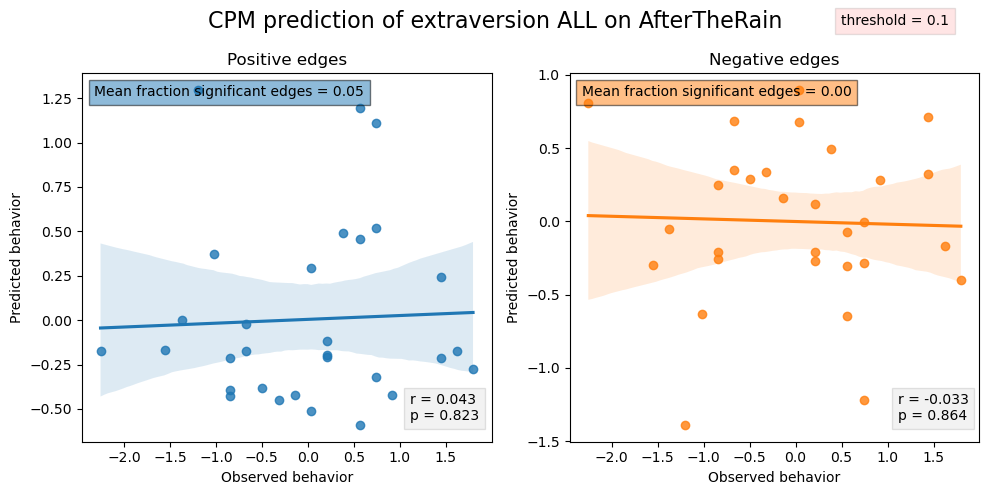

Number of significant points for AfterTheRain and ALL and bold and 0.1 is: 0.0012782694198623405 and 0.049065880039331364
Positive edges: r = 0.043, p = 0.823
Negative edges: r = -0.033, p = 0.864
Computing CPM for AfterTheRain and VIS and bold and 0.1
The shape of X for BOLD is:  (30, 136)
   predicted_pos  predicted_neg  observed         movie region  threshold  \
0       0.575114      -0.431475  0.739757  AfterTheRain    VIS        0.1   
1      -0.108411       0.815096  0.387492  AfterTheRain    VIS        0.1   
2      -0.179558      -0.312721 -0.845436  AfterTheRain    VIS        0.1   
3      -0.076908       0.171109  1.444287  AfterTheRain    VIS        0.1   
4       0.396196      -0.482731 -1.021569  AfterTheRain    VIS        0.1   

   mean_neg  mean_pos  
0  0.008333  0.027941  
1  0.008333  0.027941  
2  0.008333  0.027941  
3  0.008333  0.027941  
4  0.008333  0.027941   (30, 8)


<Figure size 640x480 with 0 Axes>

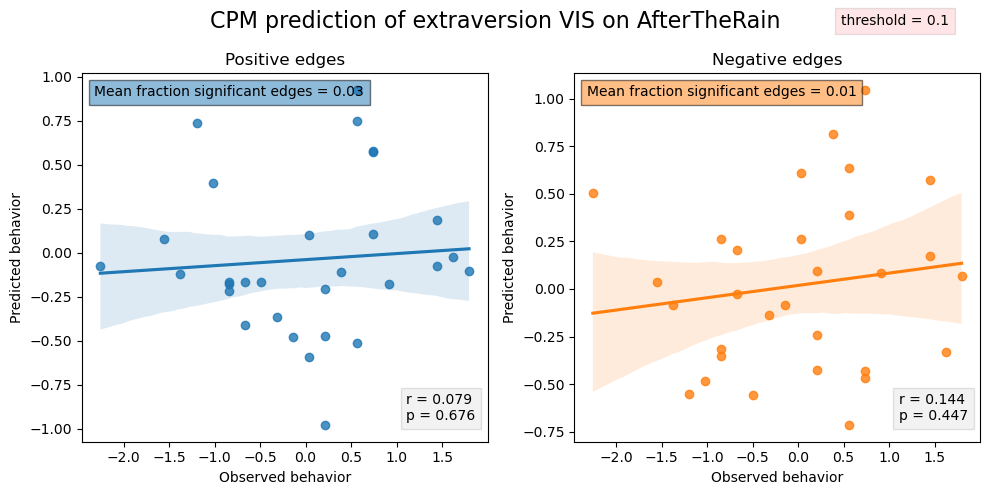

Number of significant points for AfterTheRain and VIS and bold and 0.1 is: 0.008333333333333333 and 0.027941176470588233
Positive edges: r = 0.079, p = 0.676
Negative edges: r = 0.144, p = 0.447
Computing CPM for AfterTheRain and SM and bold and 0.1
The shape of X for BOLD is:  (30, 91)
   predicted_pos  predicted_neg  observed         movie region  threshold  \
0      -0.025509      -0.025509  0.739757  AfterTheRain     SM        0.1   
1       0.480416      -0.013362  0.387492  AfterTheRain     SM        0.1   
2      -0.087572       0.029153 -0.845436  AfterTheRain     SM        0.1   
3      -0.132610      -0.049803  1.444287  AfterTheRain     SM        0.1   
4       0.729685       0.035227 -1.021569  AfterTheRain     SM        0.1   

   mean_neg  mean_pos  
0       0.0  0.049451  
1       0.0  0.049451  
2       0.0  0.049451  
3       0.0  0.049451  
4       0.0  0.049451   (30, 8)


<Figure size 640x480 with 0 Axes>

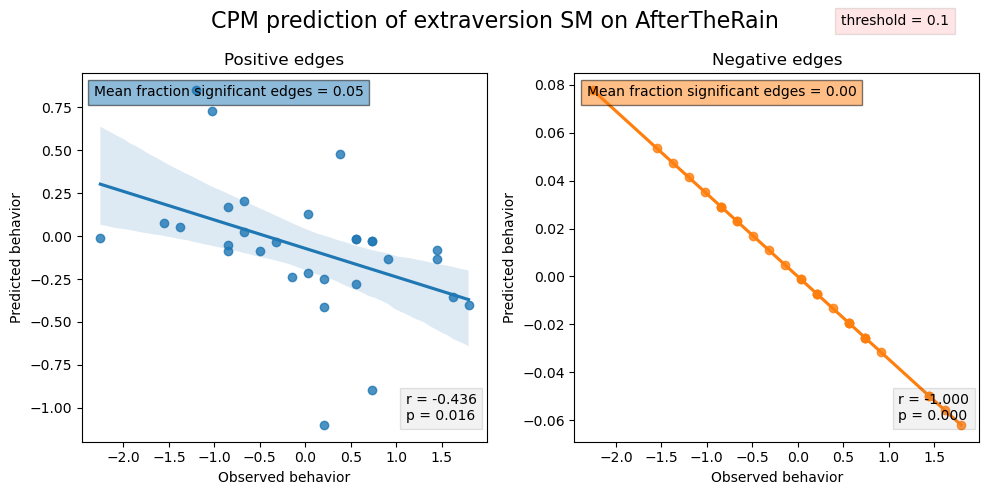

Number of significant points for AfterTheRain and SM and bold and 0.1 is: 0.0 and 0.04945054945054945
Positive edges: r = -0.436, p = 0.016
Negative edges: r = -1.000, p = 0.000
Computing CPM for AfterTheRain and VA and bold and 0.1
The shape of X for BOLD is:  (30, 66)
   predicted_pos  predicted_neg  observed         movie region  threshold  \
0       0.626574      -0.025509  0.739757  AfterTheRain     VA        0.1   
1       0.667494      -0.013362  0.387492  AfterTheRain     VA        0.1   
2      -0.418116       0.029153 -0.845436  AfterTheRain     VA        0.1   
3      -0.275648      -0.049803  1.444287  AfterTheRain     VA        0.1   
4       0.361596       0.035227 -1.021569  AfterTheRain     VA        0.1   

   mean_neg  mean_pos  
0       0.0  0.032828  
1       0.0  0.032828  
2       0.0  0.032828  
3       0.0  0.032828  
4       0.0  0.032828   (30, 8)


<Figure size 640x480 with 0 Axes>

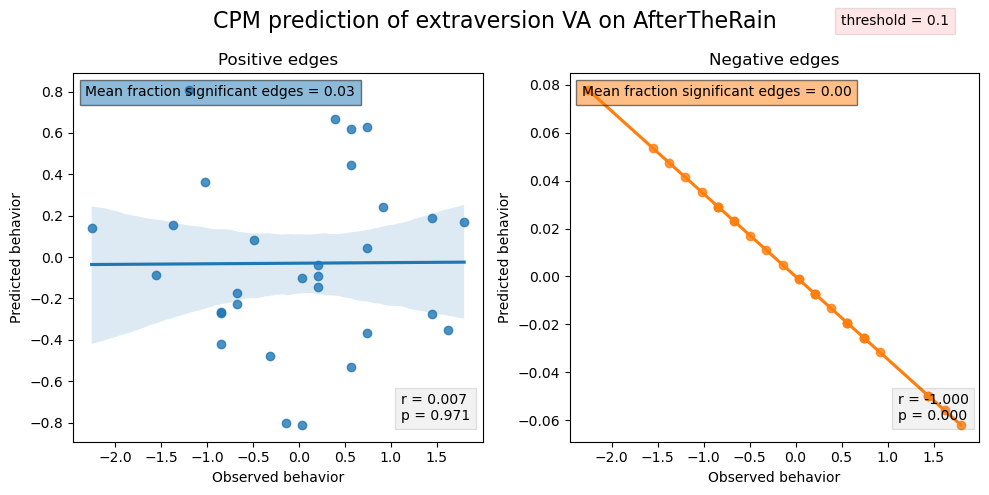

Number of significant points for AfterTheRain and VA and bold and 0.1 is: 0.0 and 0.03282828282828283
Positive edges: r = 0.007, p = 0.971
Negative edges: r = -1.000, p = 0.000
Computing CPM for AfterTheRain and DA and bold and 0.1
The shape of X for BOLD is:  (30, 105)
   predicted_pos  predicted_neg  observed         movie region  threshold  \
0       0.462156      -0.025509  0.739757  AfterTheRain     DA        0.1   
1       0.842855      -0.013362  0.387492  AfterTheRain     DA        0.1   
2       0.031585       0.029153 -0.845436  AfterTheRain     DA        0.1   
3      -0.203454      -0.049803  1.444287  AfterTheRain     DA        0.1   
4       0.285727       0.035227 -1.021569  AfterTheRain     DA        0.1   

   mean_neg  mean_pos  
0  0.000635  0.043175  
1  0.000635  0.043175  
2  0.000635  0.043175  
3  0.000635  0.043175  
4  0.000635  0.043175   (30, 8)


<Figure size 640x480 with 0 Axes>

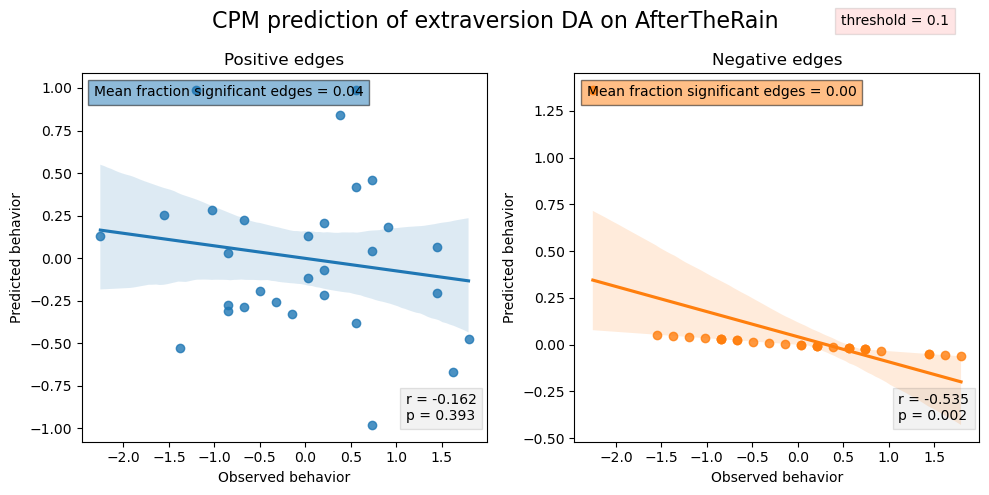

Number of significant points for AfterTheRain and DA and bold and 0.1 is: 0.000634920634920635 and 0.04317460317460317
Positive edges: r = -0.162, p = 0.393
Negative edges: r = -0.535, p = 0.002
Computing CPM for AfterTheRain and DMN and bold and 0.1
The shape of X for BOLD is:  (30, 276)
   predicted_pos  predicted_neg  observed         movie region  threshold  \
0       0.926036      -0.025509  0.739757  AfterTheRain    DMN        0.1   
1       0.410992      -0.013362  0.387492  AfterTheRain    DMN        0.1   
2      -0.051987       0.029153 -0.845436  AfterTheRain    DMN        0.1   
3      -0.124107      -0.049803  1.444287  AfterTheRain    DMN        0.1   
4       0.148562       0.035227 -1.021569  AfterTheRain    DMN        0.1   

   mean_neg  mean_pos  
0       0.0  0.042633  
1       0.0  0.042633  
2       0.0  0.042633  
3       0.0  0.042633  
4       0.0  0.042633   (30, 8)


<Figure size 640x480 with 0 Axes>

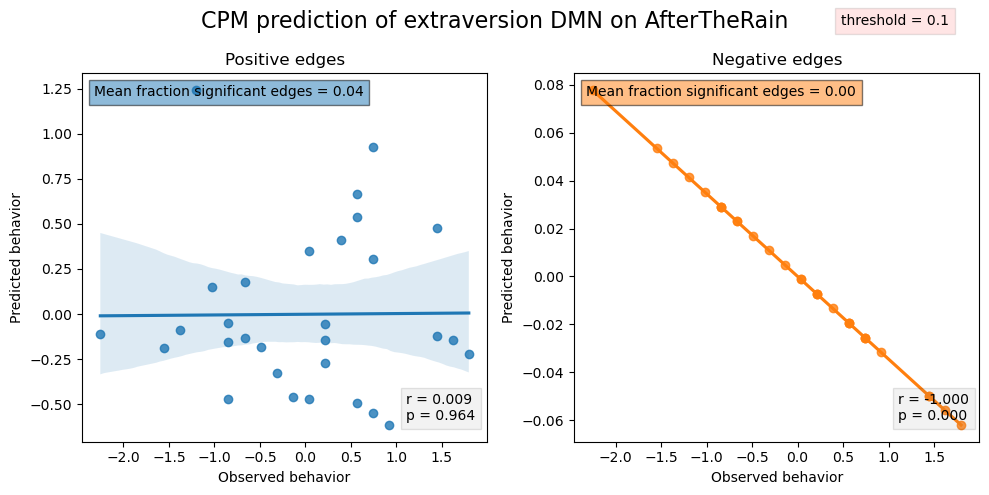

Number of significant points for AfterTheRain and DMN and bold and 0.1 is: 0.0 and 0.04263285024154591
Positive edges: r = 0.009, p = 0.964
Negative edges: r = -1.000, p = 0.000
Computing CPM for AfterTheRain and FP and bold and 0.1
The shape of X for BOLD is:  (30, 78)
   predicted_pos  predicted_neg  observed         movie region  threshold  \
0       0.744885      -0.025509  0.739757  AfterTheRain     FP        0.1   
1       0.397296      -0.013362  0.387492  AfterTheRain     FP        0.1   
2      -0.037449       0.029153 -0.845436  AfterTheRain     FP        0.1   
3      -0.156111      -0.049803  1.444287  AfterTheRain     FP        0.1   
4       0.222834       0.035227 -1.021569  AfterTheRain     FP        0.1   

   mean_neg  mean_pos  
0       0.0  0.054701  
1       0.0  0.054701  
2       0.0  0.054701  
3       0.0  0.054701  
4       0.0  0.054701   (30, 8)


<Figure size 640x480 with 0 Axes>

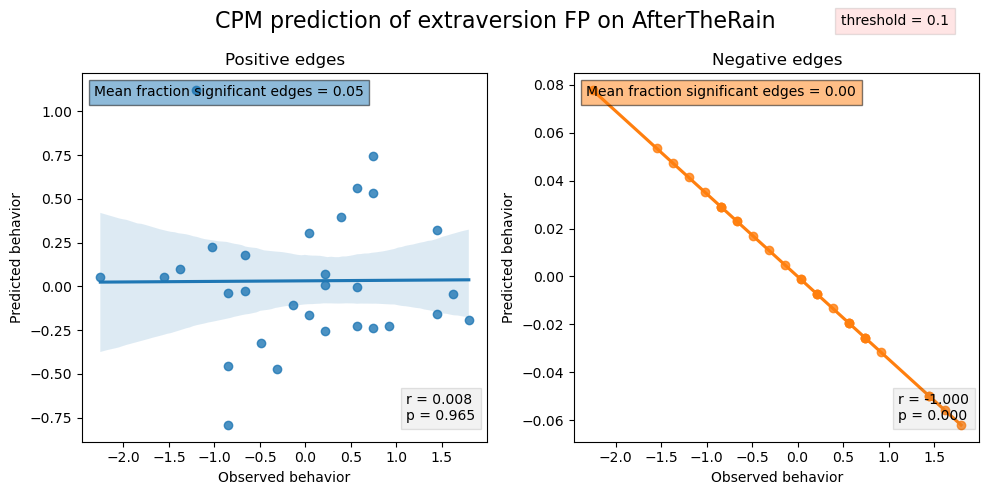

Number of significant points for AfterTheRain and FP and bold and 0.1 is: 0.0 and 0.05470085470085471
Positive edges: r = 0.008, p = 0.965
Negative edges: r = -1.000, p = 0.000
Computing CPM for BetweenViewings and ALL and bold and 0.1
The shape of X for BOLD is:  (30, 6441)


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [119]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

# CPM Function
def cpm(X_train, y_train, threshold):
    # 1. INPUTS: Divide the data into training and test sets
    M, N = X_train.shape[1], X_train.shape[0] 
    all_mats, all_behav = X_train, y_train
    all_mats = np.array(all_mats)
    all_behav = np.array(all_behav)

    # Preallocate prediction arrays
    behav_pred_pos = np.zeros((N, 1))
    behav_pred_neg = np.zeros((N, 1))
    
    # 2. CROSS VALIDATION: Perform leave-one-out procedure
    number_pos = []
    number_neg = []
    for leftout in range(N):
        # print(f'Leaving out subj # {leftout + 1:02.0f}')
        start = time.time()

        # Leave out subject from matrices and behavior
        train_mats = np.delete(all_mats, leftout, axis=0)
        train_behav = np.delete(all_behav, leftout, axis=0)

        # 3. RELATE EDGES: Correlate all edges with behavior
        r_mat = np.zeros((M))
        p_mat = np.zeros((M))

        for i in range(M):
            r, p = scipy.stats.pearsonr(train_mats[:, i], train_behav[:])
            r_mat[i] = r
            p_mat[i] = p

        # 4. EDGE SELECTION: Set threshold and define masks
        pos_mask = np.multiply(p_mat < threshold, r_mat > 0)
        neg_mask = np.multiply(p_mat < threshold, r_mat < 0)

        number_pos.append(np.sum(pos_mask) / M)
        number_neg.append(np.sum(neg_mask) / M)

        # 5. SINGLE SUBJ SUMMARY VALUES: Compute sum scores
        behav_sum_pos = np.zeros((N - 1, 1))
        behav_sum_neg = np.zeros((N - 1, 1))

        # Divide by two to control for the fact that we're counting each pair twice because the matrix is symmetric
        for i in range(N - 1):
            behav_sum_pos[i] = np.sum(np.multiply(train_mats[i, :], pos_mask))
            behav_sum_neg[i] = np.sum(np.multiply(train_mats[i, :], neg_mask))

        # 6. MODEL FITTING: Fit model on training set
        lin_model_pos = LinearRegression()
        lin_model_pos.fit(behav_sum_pos, train_behav)

        lin_model_neg = LinearRegression()
        lin_model_neg.fit(behav_sum_neg, train_behav)

        # 7. PREDICTION: Predict on left-out subject
        # Extract sum scores for left-out subject
        leftout_sum_pos = np.sum(np.multiply(all_mats[leftout], pos_mask))
        leftout_sum_neg = np.sum(np.multiply(all_mats[leftout], neg_mask))
        leftout_sum_pos = leftout_sum_pos.reshape(1,1)
        leftout_sum_neg = leftout_sum_neg.reshape(1,1)

        # Predict behavior for left-out subject
        behav_pred_pos[leftout] = lin_model_pos.predict(leftout_sum_pos)
        behav_pred_neg[leftout] = lin_model_neg.predict(leftout_sum_neg)

        end = time.time()
        minutes = (end - start) / 60
        seconds = (end - start) % 60

    mean_neg = np.mean(number_neg) 
    mean_pos = np.mean(number_pos)    

    return behav_pred_pos, behav_pred_neg, all_behav, mean_neg, mean_pos

def plot_cpm(behav_pred_pos, behav_pred_neg, all_behav, mean_neg, mean_pos, movie, region):

    # 8. EVALUATION: Compute correlations between predicted and observed behavior
    behav_pred_corr_pos = scipy.stats.pearsonr(all_behav, behav_pred_pos[:, 0])
    behav_pred_corr_neg = scipy.stats.pearsonr(all_behav, behav_pred_neg[:, 0])

    plt.figure(figsize=(10, 5))
    palette = sns.color_palette()
    plt.suptitle(f'CPM prediction of extraversion {region} on {movie}', fontsize=16)
    # add text at the bottom of the figure
    plt.figtext(0.90, 0.95, f'threshold = {threshold}', wrap=True, 
                horizontalalignment='center', fontsize=10, bbox=dict(facecolor='red', alpha=0.1))
    plt.subplot(1, 2, 1)
    sns.regplot(x = all_behav, y = behav_pred_pos, color = palette[0])
    plt.annotate(f'r = {behav_pred_corr_pos[0]:.3f}\np = {behav_pred_corr_pos[1]:.3f}', xy=[0.80, 0.05], xycoords='axes fraction', ha='left', va='bottom',
                bbox=dict(facecolor='grey', alpha=0.1))
    plt.annotate(f'Mean fraction significant edges = {mean_pos:.2f}', xy=[0.03, 0.93], xycoords='axes fraction', ha='left', va='bottom',
                bbox=dict(facecolor=palette[0], alpha=0.5))
    plt.xlabel('Observed behavior')
    plt.ylabel('Predicted behavior')
    plt.title('Positive edges')

    plt.subplot(1, 2, 2)
    sns.regplot(x = all_behav, y = behav_pred_neg, color=palette[1])
    plt.annotate(f'r = {behav_pred_corr_neg[0]:.3f}\np = {behav_pred_corr_neg[1]:.3f}', xy=[0.80, 0.05], xycoords='axes fraction', ha='left', va='bottom',
                bbox=dict(facecolor='grey', alpha=0.1))
    plt.annotate(f'Mean fraction significant edges = {mean_neg:.2f}', xy=[0.03, 0.93], xycoords='axes fraction', ha='left', va='bottom',
                bbox=dict(facecolor=palette[1], alpha=0.5))
    plt.xlabel('Observed behavior')
    plt.ylabel('Predicted behavior')
    plt.title('Negative edges')
    plt.tight_layout()

    plt.show()
    plt.savefig(f'/Users/silviaromanato/Desktop/SEMESTER_PROJECT/HigherOrder/Data/CPM/{movie}_{region}_{threshold}_CPM.png')

# compute the CPM

# 1. I want to print the number of significant points for each threshold and each region
# 2. I want to plot the correlation between predicted and observed behaviour for each threshold and each region
number_points = {}
results = {}
for threshold in [0.1, 0.05, 0.01]:    
    method = 'bold'
    PATH_DATA = '/Users/silviaromanato/Desktop/SEMESTER_PROJECT/HigherOrder/Data/Data_TC/'
    for movie in list_movies:
        for region in ['ALL', 'VIS', 'SM', 'VA', 'DA', 'DMN', 'FP']:
            print(f'Computing CPM for {movie} and {region} and {method} and {threshold}')
            # if os.path.exists(f'/Users/silviaromanato/Desktop/SEMESTER_PROJECT/HigherOrder/Data/CPM/Results/{movie}_{region}_{threshold}_CPM.csv'):
            #     continue
            X = compute_X(PATH_DATA, movie, method, regions = region)
            behav_pred_pos, behav_pred_neg, all_behav, mean_neg, mean_pos = cpm(X, extrovercy, threshold)
            # put the data in a dataframe
            if behav_pred_neg.shape[0] != 30:
                behav_pred_neg = np.concatenate((behav_pred_neg, np.zeros((30-behav_pred_neg.shape[0], 1))))
            if behav_pred_pos.shape[0] != 30:
                behav_pred_pos = np.concatenate((behav_pred_pos, np.zeros((30-behav_pred_pos.shape[0], 1))))
            # check that behav_pred_neg and behav_pred_pos have the same shape
            assert behav_pred_neg.shape == behav_pred_pos.shape

            df = pd.DataFrame({'predicted_pos': behav_pred_pos[:, 0], 'predicted_neg': behav_pred_neg[:, 0], 'observed': all_behav})
            df['movie'] = movie
            df['region'] = region
            df['threshold'] = threshold
            df['mean_neg'] = mean_neg
            df['mean_pos'] = mean_pos

            print(df.head(), df.shape)

            # save the dataframe
            df.to_csv(f'/Users/silviaromanato/Desktop/SEMESTER_PROJECT/HigherOrder/Data/CPM/Results/{movie}_{region}_{threshold}_CPM.csv', index=False)

            plot_cpm(behav_pred_pos, behav_pred_neg, all_behav, mean_neg, mean_pos, movie, region)

            number_points[f'{movie}_{region}_{threshold}'] = [mean_neg, mean_pos]
            print(f'Number of significant points for {movie} and {region} and {method} and {threshold} is: {mean_neg} and {mean_pos}')

            r_pos, p_pos = scipy.stats.pearsonr(all_behav, behav_pred_pos[:, 0])
            r_neg, p_neg = scipy.stats.pearsonr(all_behav, behav_pred_neg[:, 0])
            print(f'Positive edges: r = {r_pos:.3f}, p = {p_pos:.3f}')
            print(f'Negative edges: r = {r_neg:.3f}, p = {p_neg:.3f}')

            results[f'{movie}_{region}_{threshold}'] = [r_pos, r_neg, p_pos, p_neg]


In [118]:
all_behav.shape

(30,)